In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=8c85fb6cfd9033ee2acb744a95478b43e6fe205c5223159efe1277f8be6c76cd
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [2]:
import minisom
import pandas as pd
import numpy as np
import sklearn
import matplotlib

In [3]:
pd.__version__, np.__version__, sklearn.__version__, matplotlib.__version__

('2.0.3', '1.25.2', '1.2.2', '3.7.1')

In [8]:
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from matplotlib.pylab import pcolor, colorbar, plot

Carregamento da base de dados

In [4]:
base1 = pd.read_csv('entradas_breast.csv')
base1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000


In [5]:
X = base1.iloc[:, 0:30].values

In [6]:
base2 = pd.read_csv('saidas_breast.csv')
base2

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [7]:
y = base2.iloc[:, 0].values

Normalização para os dados ficarem entre 0 e 1

In [9]:
normalizador = MinMaxScaler(feature_range = (0, 1))
X = normalizador.fit_transform(X)

Aplicando a fórmula abordada no slide teórico, primeiro tiramos a raíz quadrada  da quantidade de registros (569), que é igual a 23,85.

Multiplicamos 23,85 por 5 = 119,26.

Vamos definir o mapa auto organizável com as dimensões 11 x 11  que equivale a 121 neurônios no total.

O input_len possui o valor 30 porque temos 30 entradas

In [10]:
som = MiniSom(x=11, y=11, input_len=30, random_seed=0,
              learning_rate=0.5, sigma=3.0)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000)

O código abaixo gera o mapa auto organizável e imprime os símbolos de acordo com os valores das classes.

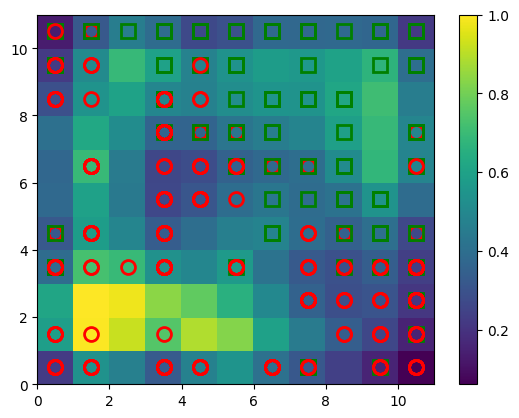

In [11]:
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]-1],
         markerfacecolor='None', markersize=10,
         markeredgecolor=colors[y[i]-1], markeredgewidth=2)